# Diffusion Maps + TDA

In this module, we will explore how nonlinear dimension reduction (NLDR) can complement TDA tools.  We will use NLDR both as a preprocessing tool for TDA, and we will also use it as a 

In [2]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from ripser import ripser, plot_dgms
from GeomUtils import getGreedyPerm
from DiffusionMaps import *

In [ ]:
def getPinchedCircle(N):
    t = np.linspace(0, 2*np.pi, N+1)[0:N]
    x = np.zeros((N, 2))
    x[:, 0] = (1.5 + np.cos(2*t))*np.cos(t)
    x[:, 1] = (1.5 + np.cos(2*t))*np.sin(t)
    return x

def getTorusKnot(N, p, q):
    t = np.linspace(0, 2*np.pi, N+1)[0:N]
    X = np.zeros((N, 3))
    r = np.cos(q*t) + 2
    X[:, 0] = r*np.cos(p*t)
    X[:, 1] = r*np.sin(p*t)
    X[:, 2] = -np.sin(q*t)
    return X


<IPython.core.display.Javascript object>


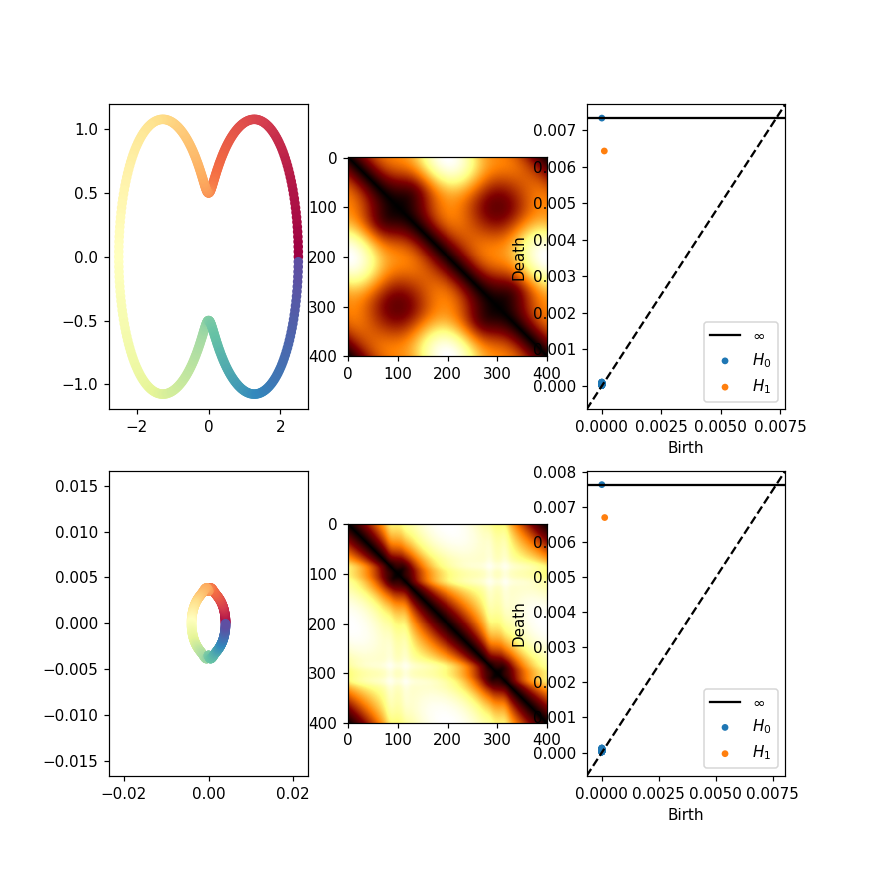

In [8]:
N = 400
XOrig = getPinchedCircle(N)
SSMOrig = getSSM(XOrig)
Kappa = 0.1
t = 100

dgms1 = ripser(X)['dgms']
M = getDiffusionMap(SSMOrig, Kappa, t)
dgms2 = ripser(M)['dgms']
SSM = getSSM(M)
X = M[:, [-2, -3]]

plt.figure(figsize=(8, 8))
plt.subplot(231)
plt.scatter(XOrig[:, 0], XOrig[:, 1], 40, np.arange(N), cmap = 'Spectral', edgecolor = 'none')
plt.subplot(232)
plt.imshow(SSMOrig, interpolation = 'nearest', cmap = 'afmhot')
plt.subplot(233)
plot_dgms(dgms1)
plt.subplot(234)
plt.scatter(X[:, 0], X[:, 1], 40, np.arange(N), cmap = 'Spectral', edgecolor = 'none')
plt.subplot(235)
plt.imshow(SSM, interpolation = 'nearest', cmap = 'afmhot')
plt.subplot(236)
plot_dgms(dgms2)

plt.show()